import json
import requests
from bs4 import BeautifulSoup as bs

In [93]:
#!pip install twitter
#!pip install twitterAPI

In [150]:

import os
import tweepy as tw
import pandas as pd
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

In [151]:
# Define the search term and the date_since date as variables
search_words = "#TheGreenBook"
date_since = "2019-01-24"

In [152]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)
tweets

In [164]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1000)

# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

Just watched #TheGreenBook on @primevideouk I can't believe it took me this long to watch it - absolutely brilliant… https://t.co/PTAL9jGgfl
RT @ericabuddington: 70+ years ago the space began with four rooms in Ulster County. Today, it boasts over 110+, a mix of bungalows, traile…
RT @LetUsGetHonest: Those media @ 2007, but @i 1999ff a"#GreenbookInitiative  NCJFCJ partners with what's now #FuturesWithoutViolence aftr…
Modern problems require modern solutions. These books might not be coming out but I know a book that’s coming out s… https://t.co/nJwla5uiI9
The Blade of Gamora. Modern problems require modern solutions. #apps #yelp #fivestars #racistrating… https://t.co/vVpcDP2QC2
Dear Parents and Teachers:  Read "Ruth and the Green Book" to your class.  #TheGreenBook  #JimCrow  #BlackHistory https://t.co/zECBoyrPum
@SCAAHC1993 facinating doc about #TheGreenBook showing on Irish Language TV @TG4TV with English subtitles… https://t.co/EKgUFSKRcF
"Being American is not letting someone else

In [165]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(1000)

# Collect a list of tweets
all_tweets=[tweet.text for tweet in tweets]
all_tweets[:5]


["Just watched #TheGreenBook on @primevideouk I can't believe it took me this long to watch it - absolutely brilliant… https://t.co/PTAL9jGgfl",
 'RT @ericabuddington: 70+ years ago the space began with four rooms in Ulster County. Today, it boasts over 110+, a mix of bungalows, traile…',
 'RT @LetUsGetHonest: Those media @ 2007, but @i 1999ff a"#GreenbookInitiative  NCJFCJ partners with what\'s now #FuturesWithoutViolence aftr…',
 'Modern problems require modern solutions. These books might not be coming out but I know a book that’s coming out s… https://t.co/nJwla5uiI9',
 'The Blade of Gamora. Modern problems require modern solutions. #apps #yelp #fivestars #racistrating… https://t.co/vVpcDP2QC2']

In [166]:
import re
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [167]:
tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
tweets_no_urls[:50]


['Just watched TheGreenBook on primevideouk I cant believe it took me this long to watch it absolutely brilliant',
 'RT ericabuddington 70 years ago the space began with four rooms in Ulster County Today it boasts over 110 a mix of bungalows traile',
 'RT LetUsGetHonest Those media 2007 but i 1999ff aGreenbookInitiative NCJFCJ partners with whats now FuturesWithoutViolence aftr',
 'Modern problems require modern solutions These books might not be coming out but I know a book thats coming out s',
 'The Blade of Gamora Modern problems require modern solutions apps yelp fivestars racistrating',
 'Dear Parents and Teachers Read Ruth and the Green Book to your class TheGreenBook JimCrow BlackHistory',
 'SCAAHC1993 facinating doc about TheGreenBook showing on Irish Language TV TG4TV with English subtitles',
 'Being American is not letting someone else decide who you are and what you should be calledAnocht ar For Sca']

In [168]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [171]:
 #Create textblob objects of the tweets
#!pip install textblob
from textblob import TextBlob
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[7].polarity, sentiment_objects[7]

(0.0,
 TextBlob("Being American is not letting someone else decide who you are and what you should be calledAnocht ar For Sca"))

In [172]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[1:]

[[0.0,
  'RT ericabuddington 70 years ago the space began with four rooms in Ulster County Today it boasts over 110 a mix of bungalows traile'],
 [0.0,
  'RT LetUsGetHonest Those media 2007 but i 1999ff aGreenbookInitiative NCJFCJ partners with whats now FuturesWithoutViolence aftr'],
 [0.2,
  'Modern problems require modern solutions These books might not be coming out but I know a book thats coming out s'],
 [0.2,
  'The Blade of Gamora Modern problems require modern solutions apps yelp fivestars racistrating'],
 [-0.2,
  'Dear Parents and Teachers Read Ruth and the Green Book to your class TheGreenBook JimCrow BlackHistory'],
 [0.0,
  'SCAAHC1993 facinating doc about TheGreenBook showing on Irish Language TV TG4TV with English subtitles'],
 [0.0,
  'Being American is not letting someone else decide who you are and what you should be calledAnocht ar For Sca']]

In [173]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.425,Just watched TheGreenBook on primevideouk I ca...
1,0.000,RT ericabuddington 70 years ago the space bega...
2,0.000,RT LetUsGetHonest Those media 2007 but i 1999f...
3,0.200,Modern problems require modern solutions These...
4,0.200,The Blade of Gamora Modern problems require mo...


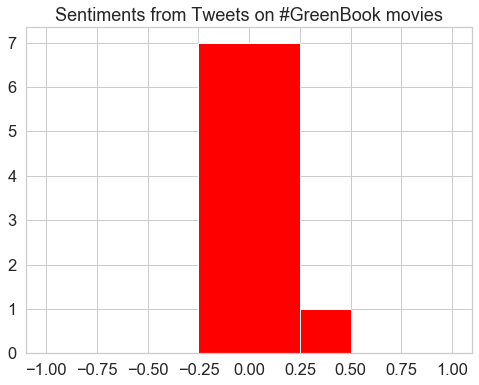

In [174]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="red")

plt.title("Sentiments from Tweets on #GreenBook movies")
plt.show()

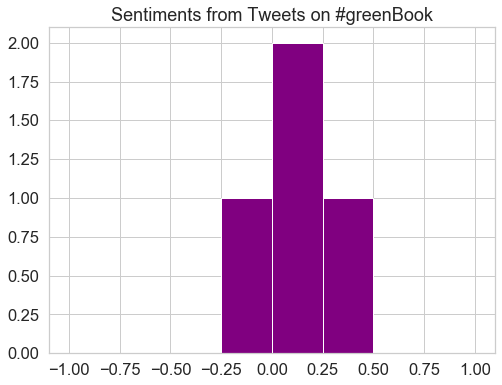

In [175]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on #greenBook")
plt.show()